In [2]:
import pickle
import lzma
import datetime
import pandas as pd
import altair as alt
import numpy as np
from vega_datasets import data

In [3]:
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [4]:
dnslog = list()
i = 0
with lzma.open("data/2019-05-17-dnslog_archive-000.xz") as f:
    while i < 10000:
        try:
            temp = pickle.load(f)
        except EOFError:
            break
        print(temp)
        i += 1

{'answer_index': 5712546, 'response_addresses': [], 'opcode': 0, 'dst_port': 44316, 'protocol': 17, 'src_ip': IPv4Address('192.168.151.1'), 'obfuscated_dst': '5bc04c362f6c1f5f4e1e6b5cf6bafa7a8bbaa36afd505e5256147f763ed8f053', 'host': '', 'resultcode': 2, 'response_ttls': [], 'timestamp': datetime.datetime(2019, 5, 13, 8, 28, 8), 'src_port': 53}
{'answer_index': 5712546, 'response_addresses': [], 'opcode': 0, 'dst_port': 60649, 'protocol': 17, 'src_ip': IPv4Address('192.168.151.1'), 'obfuscated_dst': '5bc04c362f6c1f5f4e1e6b5cf6bafa7a8bbaa36afd505e5256147f763ed8f053', 'host': '', 'resultcode': 2, 'response_ttls': [], 'timestamp': datetime.datetime(2019, 5, 13, 8, 28, 8), 'src_port': 53}
{'answer_index': 5712546, 'response_addresses': [], 'opcode': 0, 'dst_port': 65420, 'protocol': 17, 'src_ip': IPv4Address('192.168.151.1'), 'obfuscated_dst': '5bc04c362f6c1f5f4e1e6b5cf6bafa7a8bbaa36afd505e5256147f763ed8f053', 'host': '', 'resultcode': 2, 'response_ttls': [], 'timestamp': datetime.datetime

{'answer_index': 2384095, 'response_addresses': [IPv4Address('50.116.6.123'), IPv4Address('199.223.248.98'), IPv4Address('38.229.71.1'), IPv4Address('45.79.13.206')], 'opcode': 0, 'dst_port': 1482, 'protocol': 17, 'src_ip': IPv4Address('192.168.151.1'), 'obfuscated_dst': '5bc04c362f6c1f5f4e1e6b5cf6bafa7a8bbaa36afd505e5256147f763ed8f053', 'host': '0.pool.ntp.org', 'resultcode': 0, 'response_ttls': ['0', '0', '0', '0'], 'timestamp': datetime.datetime(2019, 4, 5, 0, 46, 48), 'src_port': 53}
{'answer_index': 2383974, 'response_addresses': [IPv4Address('50.116.6.123'), IPv4Address('199.223.248.98'), IPv4Address('38.229.71.1'), IPv4Address('45.79.13.206')], 'opcode': 0, 'dst_port': 49209, 'protocol': 17, 'src_ip': IPv4Address('192.168.151.1'), 'obfuscated_dst': '5bc04c362f6c1f5f4e1e6b5cf6bafa7a8bbaa36afd505e5256147f763ed8f053', 'host': '0.pool.ntp.org', 'resultcode': 0, 'response_ttls': ['122', '122', '122', '122'], 'timestamp': datetime.datetime(2019, 4, 5, 0, 44, 45), 'src_port': 53}
{'ans

{'answer_index': 248344, 'response_addresses': [], 'opcode': 0, 'dst_port': 16000, 'protocol': 17, 'src_ip': IPv4Address('192.168.151.1'), 'obfuscated_dst': 'f6a059f05f2cc985f49d1f33e566910962d238de2b9c9bc44c95f0bc108306f7', 'host': '1.cn.pool.ntp.org', 'resultcode': 2, 'response_ttls': [], 'timestamp': datetime.datetime(2019, 5, 12, 5, 27, 10), 'src_port': 53}
{'answer_index': 248344, 'response_addresses': [], 'opcode': 0, 'dst_port': 30011, 'protocol': 17, 'src_ip': IPv4Address('192.168.151.1'), 'obfuscated_dst': 'c42c5d6c020e91ee909bd4bf1db1ccdd6a0045cf416f9bf1ec98f2f5a0dff445', 'host': '1.cn.pool.ntp.org', 'resultcode': 2, 'response_ttls': [], 'timestamp': datetime.datetime(2019, 5, 12, 5, 27, 10), 'src_port': 53}
{'answer_index': 248344, 'response_addresses': [], 'opcode': 0, 'dst_port': 27035, 'protocol': 17, 'src_ip': IPv4Address('192.168.151.1'), 'obfuscated_dst': 'c42c5d6c020e91ee909bd4bf1db1ccdd6a0045cf416f9bf1ec98f2f5a0dff445', 'host': '1.cn.pool.ntp.org', 'resultcode': 2, '

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



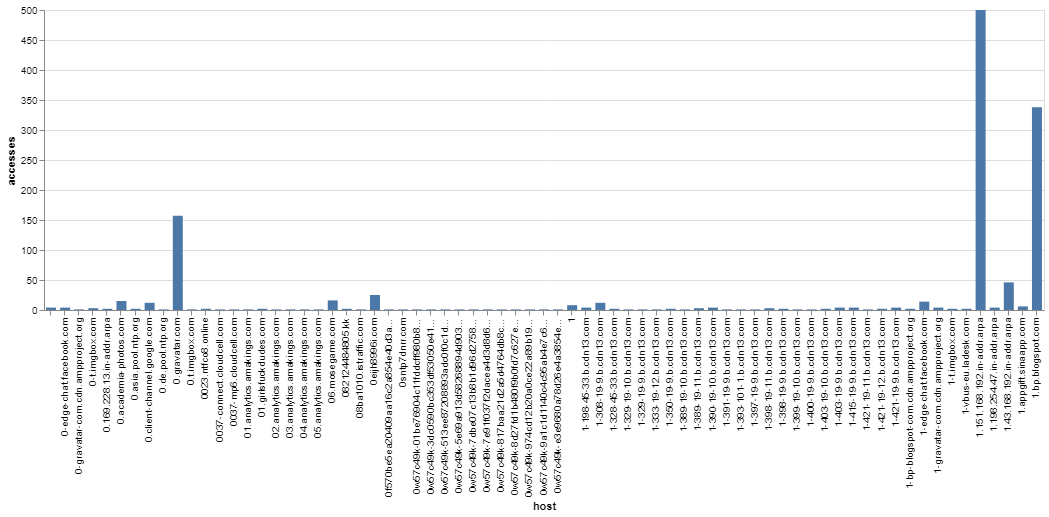

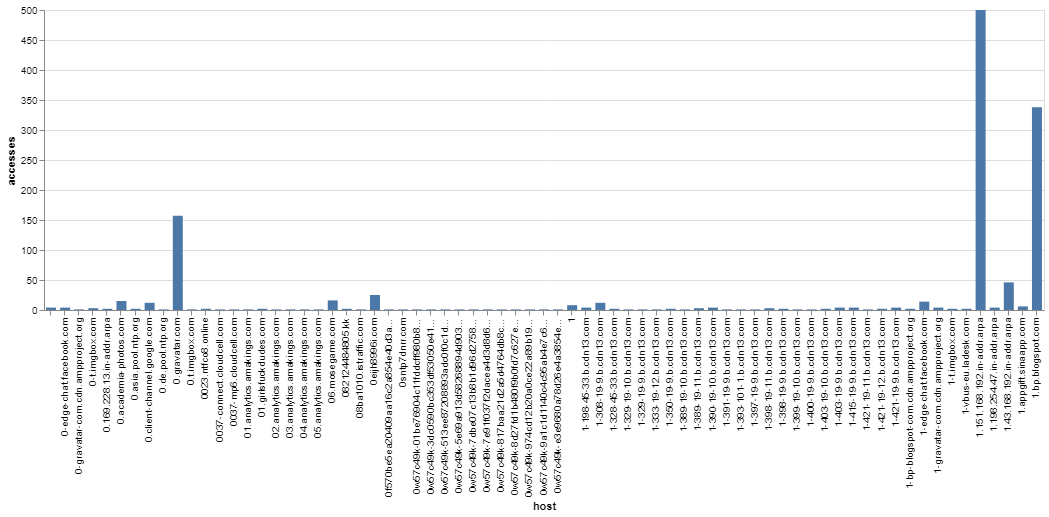

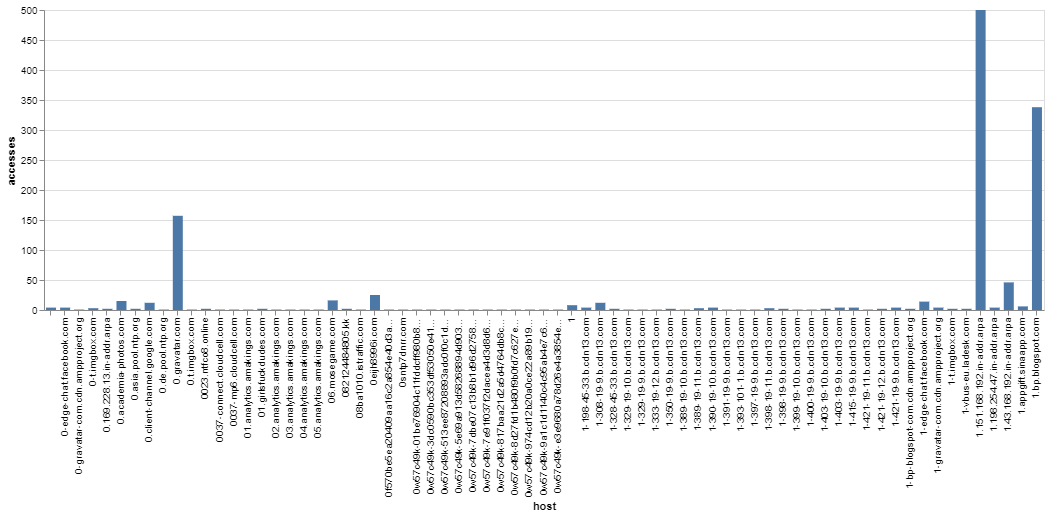

In [11]:
hosts = dict()
for entry in dnslog:
    if entry['host'] != '0.pool.ntp.org' and entry['host'] != '1.cn.pool.ntp.org':
        if entry['host'] not in hosts.keys():
            hosts[entry['host']] = 1
        else:
            hosts[entry['host']] += 1
frame = pd.DataFrame({'host': list(hosts.keys()),
                     'accesses': list(hosts.values())})
alt.Chart(frame).mark_bar(size=10).encode(
    x='host',
    y='accesses'
).properties(width=1000)